# DSC 550 Final Project
## Arbaz Khan

In [86]:
import numpy as np
import pandas as pd

aviationData = pd.read_csv("AviationData.csv", encoding_errors='ignore', low_memory=False)

# Change the date and time column to the datetype data type
# This will allow for more easily displaying dates
aviationData["Event.Date"] = pd.to_datetime(aviationData["Event.Date"], utc = True)

# Create a column specifically for the year of the accident
aviationData['Year'] = pd.DatetimeIndex(aviationData['Event.Date']).year

# Change from datetime to integer type
aviationData['Year'] = aviationData['Year'].astype(int)

# Clean data for null values
aviationData["Total.Fatal.Injuries"] = aviationData["Total.Fatal.Injuries"].fillna(0)
aviationData["Total.Uninjured"] = aviationData["Total.Uninjured"].fillna(0)

# Don't need this column, meaningless ID
aviationData.drop(columns='Event.Id', inplace=True)

# Make unknown values in table have consistent value
# (replace 'Unk' with 'UNK')
aviationData["Weather.Condition"].mask(aviationData["Weather.Condition"] == "Unk", "UNK", inplace=True)

aviationData['dates'] = aviationData['Event.Date']

# Ignore unknown phases for this column
phaseVals = ["0", "1","2", "3", "3", "4", "5", "6", "7"]

aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Taxi", "1", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Climb", "2", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Takeoff", "2", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Cruise", "3", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Maneuvering", "3", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Approach", "4", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Descent", "5", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Go-around", "6", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Landing", "7", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Other", "Unknown", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Unknown", "0", inplace=True)

# Remove standing accidents
aviationData = aviationData.drop(aviationData[aviationData["Broad.phase.of.flight"] == "Standing"].index)

######################################
# Remove unknown phase accidents
aviationData["Broad.phase.of.flight"].fillna(3, inplace = True)
#aviationData = aviationData.drop(aviationData[aviationData["Broad.phase.of.flight"].isin(phaseVals) == False].index)
aviationData["Broad.phase.of.flight"] = aviationData["Broad.phase.of.flight"].astype(int)

aviationData["Phase"] = aviationData["Broad.phase.of.flight"]

C:\Users\Arbaz\AppData\Local\Temp\ipykernel_8328\26110008.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aviationData["Weather.Condition"].mask(aviationData["Weather.Condition"] == "Unk", "UNK", inplace=True)
C:\Users\Arbaz\AppData\Local\Temp\ipykernel_8328\26110008.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

# Changes made

The changes made to the data were largely to make dislaying the data more easy by changing the datatype to 'datetime'. In addition, values for the weather condition were inconsistent, and made to more consistently be either 'NaN', 'UNK', or 'IMC'/'VMC'. 

For my topic, there are many legal guidelines to all aspects of aviation. All of the data from these commercial flights has been made public, and does not include unnecessary personal information such as about the passengers. The data was mostly taken from the public data about the flights as well as data that could have been retrieved from the airplane's black boxes post incident, alongisde public weather station reports. In terms of ethical implications, the biggest concern might be that performing this kind of analysis is risky since it is very hard to accurately deduce the cause of a crash from the data alone, and that we could be making the wrong conclusions about aviation safety and influence changes in the system negatively. 

In [87]:
# Project Milestone 3
# Scrapes HTML from Wikipedia page listing accidents and descriptions.
# Records index, date, and a description for the event, with proper formatting
# Goal is to use this data with a NL algorithm to make some conclusions about 
# aviation safety.

from bs4 import BeautifulSoup

# Using https://en.wikipedia.org/wiki/List_of_accidents_and_incidents_involving_commercial_aircraft
fd = open('accidents.html', 'r', encoding='utf-8')

# Read webpage in as beautiful soup object
soup = BeautifulSoup(fd)
fd.close()

# Find bullet points in webpage
div = soup.find("div", class_="mw-content-ltr mw-parser-output")

df = pd.DataFrame({"date":[], "description":[]})
i = 0

year = 1919

# Find each h3 tag in body as well as ul tag
# h3 tag contains year, ul contains list items with description
for hl in div.find_all(['h3', 'ul']):

    # If it is an h3 tag, it is the year for all of the 
    # 'li' elements in the following 'ul' tag
    if hl.name == 'h3':
        year = hl.getText()

    # Otherwise, it is a 'ul' tag, with 'li' items containing
    # text description for the event
    else:
        for bullet in hl.findAll('li'):
            try:
                # First transformation step is to split the value in each 
                # bullet by the dash, to separate date as well as description
                date, info = bullet.getText().split('–') 
                date += year
            except ValueError:
                i += 1
            else:    
                df.loc[i] = [date, info]
                i +=1

# Drop the last 20 values, which is extra elements after the 
# data used to format the webpage
df.drop(df.tail(20).index, inplace = True)

df.head(10)

,date,description
0,July 21 1919,The Goodyear dirigible Wingfoot Air Express c...
1,August 2 1919,"A Caproni Ca.48 crashed at Verona, Italy, dur..."
2,December 14 1920,A Handley Page O/400 hit a tree and crashed a...
3,March 31 1922,A Beijing-Han Airlines Handley Page O/7 hit t...
4,April 7 1922,"In the Picardie mid-air collision, a De Havil..."
5,January 13 1923,An Aeromarine 75 seaplane of Aeromarine West ...
6,May 14 1923,An Air Union Farman F.60 Goliath crashed near...
7,August 27 1923,An Air Union Farman F.60 Goliath crashed near...
8,September 14 1923,A Daimler Airway de Havilland DH.34 crashed a...
9,December 24 1924,An Imperial Airways de Havilland DH.34 crashe...


In [88]:
# drop any null values for description
df.dropna(subset = ['description'], inplace = True)

# Drop duplicates
df.drop_duplicates(inplace =  True)

# Convert dates to pandas datetime format
df['dates'] = pd.to_datetime(df['date'], format='%B %d %Y', utc = True)



## Ethical Implications of this Data

    In terms of ethical concerns, since this data is gathered from public NTSB sources and does not divulge personal passenger information, there are only some small concerns related to the handling of this data. The largest one is that utilizing an NL algorithm, or any sort of software to analyze text descriptions, can result in incorrect assumptions or conclusions being drawn. This topic has a number of legal regulations regarding aviation safety, and it is foreseeable that the larger aviation authority would not approve of any frivolous conclusions garnering attention in the media. To circumvent this, concrete conclusions cannot be drawn from such analysis without some kind of rigorous data or alternative sources that can confirm these conclusions.

In [89]:
import urllib.request
import urllib.parse
import urllib.error
import requests
import json
import os

url = "https://data.ntsb.gov/data.json"  

response = requests.get(url)

data = response.json()  


link = data['dataset'][0]['distribution'][4]['downloadURL']


In [90]:
import urllib.request
from urllib.request import urlopen

req = urllib.request.Request(link)
req.add_header('User-Agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0')
req.add_header('Accept', 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8')
req.add_header('Accept-Language', 'en-US,en;q=0.5')

socket = urllib.request.urlopen(req).read()
xl = pd.ExcelFile(socket)

C:\Users\Arbaz\AppData\Local\Temp\ipykernel_8328\3131935044.py:10: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  xl = pd.ExcelFile(socket)


In [91]:
df3 = pd.read_excel(xl, sheet_name='Data_GA')
df3.columns = df3.iloc[0]

df3.drop(0, inplace = True)
df3['AccidentDate'] = pd.to_datetime(df3['AccidentDate'], utc = True)

df3['dates'] = df3['AccidentDate']

# Merging Datasets

In [92]:
merged = pd.merge(aviationData, df3, how = 'outer', on = 'dates')

In [93]:
merged = pd.merge(df, merged, how = 'outer', on = 'dates')
merged.head(5)

,date,description,dates,Investigation.Type,Accident.Number,Event.Date,Location,Country_x,Latitude_x,Longitude_x,...,DamageLevel,AircraftCategory,RegulationFlightConductedUnder,FlightScheduledType,FlightTerminalType,FlightServiceType,FlightOperationType,DefiningEvent,PhaseOfFlight,IntentionalAct
0,July 21 1919,The Goodyear dirigible Wingfoot Air Express c...,1919-07-21 00:00:00+00:00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,August 2 1919,"A Caproni Ca.48 crashed at Verona, Italy, dur...",1919-08-02 00:00:00+00:00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,December 14 1920,A Handley Page O/400 hit a tree and crashed a...,1920-12-14 00:00:00+00:00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,March 31 1922,A Beijing-Han Airlines Handley Page O/7 hit t...,1922-03-31 00:00:00+00:00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April 7 1922,"In the Picardie mid-air collision, a De Havil...",1922-04-07 00:00:00+00:00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
import sqlalchemy
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

merged.to_sql(name = 'users', con=engine)

94654

Text(0.5, 1.0, 'Total Minor Injuries From 1980-2023')

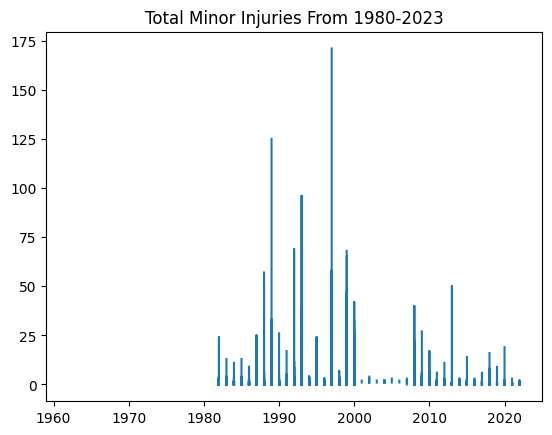

In [101]:
import matplotlib.pyplot as plt

merged['Year'] = pd.DatetimeIndex(merged['date']).year

plt.plot(merged['Year'], merged['Total.Minor.Injuries'])
plt.title("Total Minor Injuries From 1980-2023")

Text(0.5, 1.0, 'Total Serious Injuries From 1980-2023')

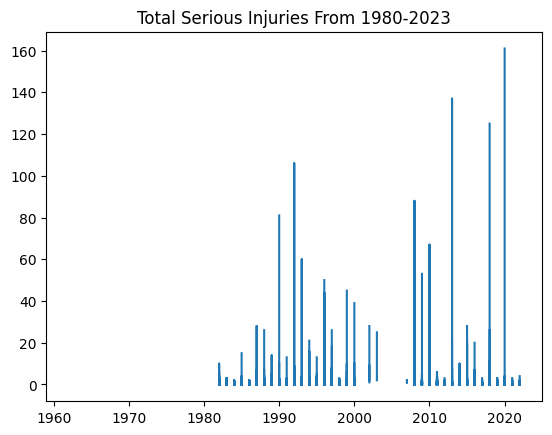

In [102]:
plt.plot(merged['Year'], merged['Total.Serious.Injuries'])
plt.title("Total Serious Injuries From 1980-2023")

Text(0.5, 1.0, 'Total Fatal Injuries From 1980-2023')

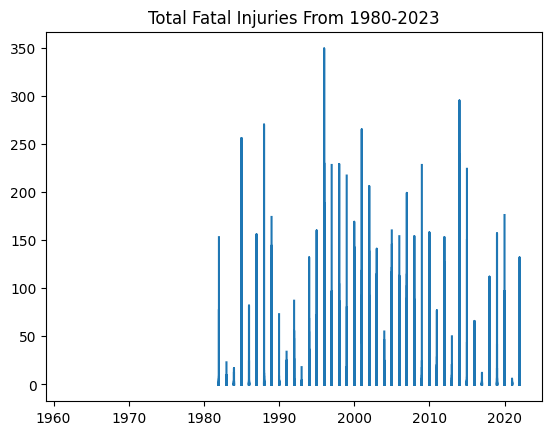

In [103]:
plt.plot(merged['Year'], merged['Total.Fatal.Injuries'])
plt.title("Total Fatal Injuries From 1980-2023")

Text(0.5, 1.0, 'Accident Occurrence For Each Phase Of Flight 1980-2023')

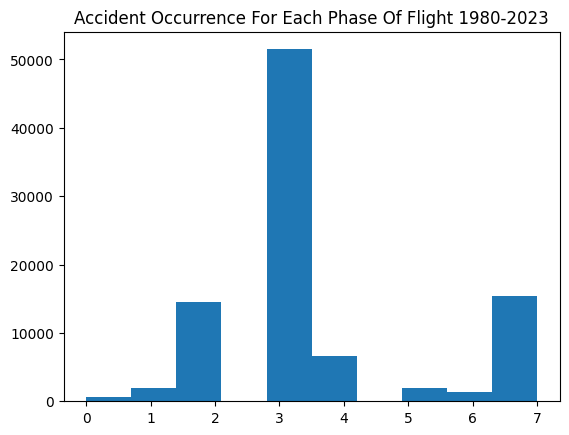

In [104]:
plt.hist(merged['Phase'])
plt.title("Accident Occurrence For Each Phase Of Flight 1980-2023")

(array([  17.,   34.,   90.,  129.,  229.,  211., 1757., 1448., 1336.,
        1057.]),
 array([1919. , 1929.5, 1940. , 1950.5, 1961. , 1971.5, 1982. , 1992.5,
        2003. , 2013.5, 2024. ]),
 <BarContainer object of 10 artists>)

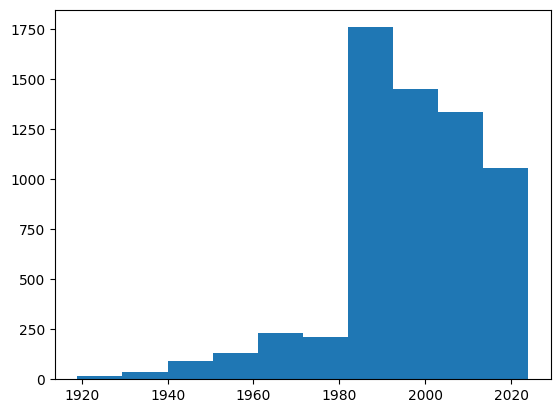

In [99]:
plt.hist(merged['Year'])